In [1]:
import sys

sys.path.append("../")

In [2]:
import cheetah
import matplotlib.pyplot as plt
import numpy as np
from gymnasium.wrappers import RescaleAction
from stable_baselines3.common.env_checker import check_env

from src.environments.awake_e_steering import AwakeESteering

In [3]:
env = AwakeESteering(backend="cheetah")
env

In [4]:
env.observation_space

Box(-inf, inf, (10,), float32)

In [5]:
env.action_space

Box(-0.0003, 0.0003, (10,), float32)

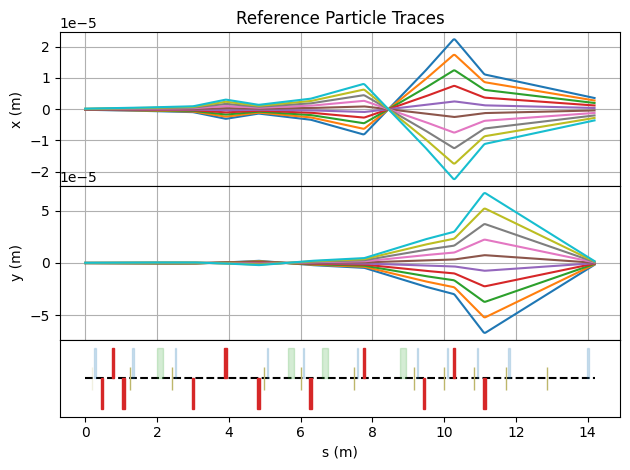

In [6]:
env.backend.segment.plot_overview()

In [7]:
env.reset()

(array([ 0.00033314,  0.00035689,  0.00056453,  0.00099211,  0.00238557,
        -0.00281372, -0.0062802 , -0.00490488, -0.00317698, -0.00223996],
       dtype=float32),
 {'backend_info': {'incoming_beam': array([ 1.0011540e+08,  3.7981302e-04, -4.7677950e-05,  3.9735605e-04,
          -5.1112722e-05,  6.8714005e-05,  1.6321761e-05,  3.3661246e-04,
           1.9858375e-05,  8.7996314e-06,  2.0627945e-04], dtype=float32),
   'quadrupole_settings': [tensor(-5.0858),
    tensor(9.5040),
    tensor(-8.2401),
    tensor(-31.7251),
    tensor(19.7035),
    tensor(-31.7251),
    tensor(-7.9238),
    tensor(26.8718),
    tensor(-1.0791),
    tensor(16.7789),
    tensor(-14.0290)]}})

In [8]:
env.step(env.action_space.sample())

(array([ 0.00058299,  0.00126599,  0.00306434,  0.00563687,  0.01372606,
        -0.01631417, -0.03652239, -0.02861839, -0.01866359, -0.0130861 ],
       dtype=float32),
 -1.780487783253193,
 False,
 False,
 {'backend_info': {'incoming_beam': array([ 1.0011540e+08,  3.7981302e-04, -4.7677950e-05,  3.9735605e-04,
          -5.1112722e-05,  6.8714005e-05,  1.6321761e-05,  3.3661246e-04,
           1.9858375e-05,  8.7996314e-06,  2.0627945e-04], dtype=float32),
   'quadrupole_settings': [tensor(-5.0858),
    tensor(9.5040),
    tensor(-8.2401),
    tensor(-31.7251),
    tensor(19.7035),
    tensor(-31.7251),
    tensor(-7.9238),
    tensor(26.8718),
    tensor(-1.0791),
    tensor(16.7789),
    tensor(-14.0290)]}})

In [9]:
wrapped_env = RescaleAction(env, -1, 1)

check_env(wrapped_env)

In [10]:
env.backend.segment.length

tensor(14.1926)

In [11]:
len(env.backend.segment.elements)

92

In [12]:
sum(isinstance(element, cheetah.Quadrupole) for element in env.backend.segment.elements)

11

In [13]:
[
    element.name
    for element in env.backend.segment.elements
    if isinstance(element, cheetah.Quadrupole)
]

['MQAWD_430031',
 'MQAWF_430034',
 'MQAWD_430037',
 'MQAWD_430109',
 'MQAWF_430118',
 'MQAWD_430128',
 'MQAWF_430205',
 'MQAWF_430311',
 'MQAWD_412344',
 'MQAWF_412346',
 'MQAWD_412347']

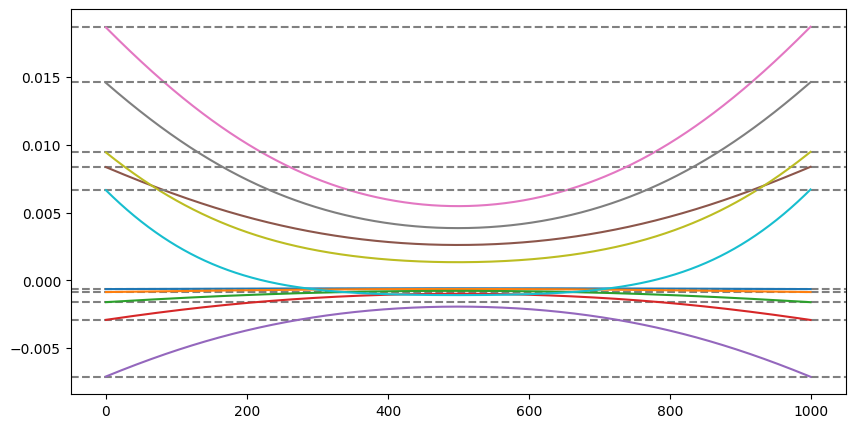

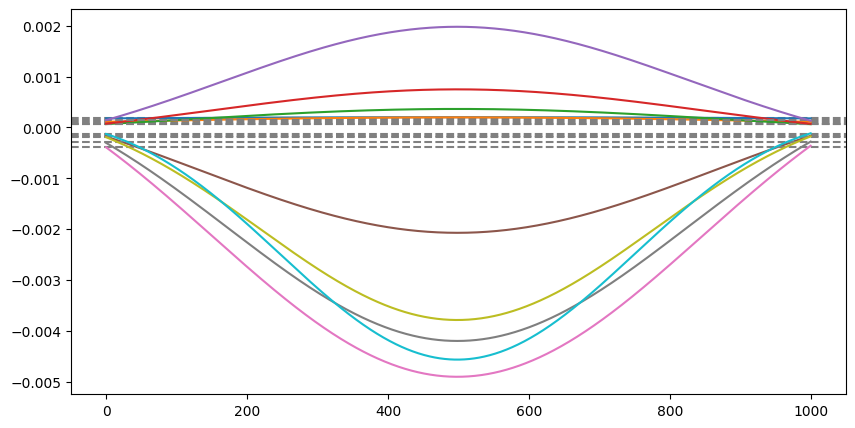

In [14]:
env = AwakeESteering(backend="cheetah", backend_args={"quad_drift_amplitude": 1.0})
observation_on_reset, _ = env.reset()
observations = np.array([env.step(np.zeros(10))[0] for _ in range(1_000)])

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.axhline(observation_on_reset[i], ls="--", color="grey")
    plt.plot(observations[:, i])
plt.show()

# Repeat with different reset

observation_on_reset, _ = env.reset()
observations = np.array([env.step(np.zeros(10))[0] for _ in range(1_000)])

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.axhline(observation_on_reset[i], ls="--", color="grey")
    plt.plot(observations[:, i])
plt.show()

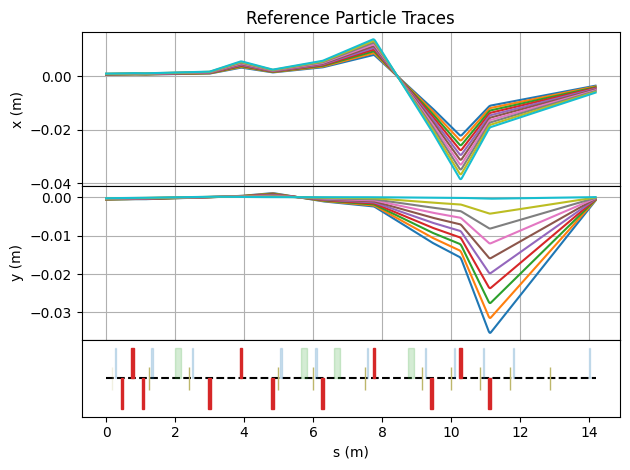

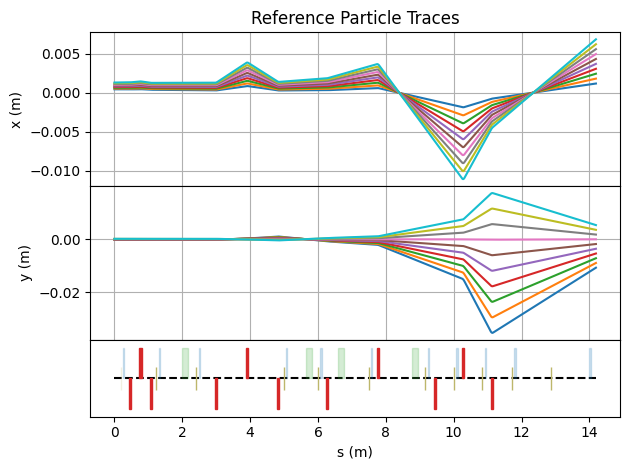

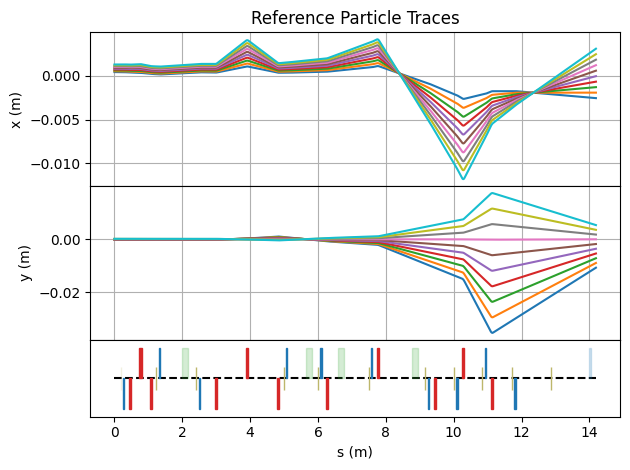

In [18]:
env = AwakeESteering(backend="cheetah", backend_args={"quad_drift_amplitude": 1.0})
_, _ = env.reset()
env.backend.segment.plot_overview(beam=env.backend.incoming)

observation_on_reset, _ = env.reset()
observations = np.array([env.step(np.zeros(10))[0] for _ in range(500)])

env.backend.segment.plot_overview(beam=env.backend.incoming)

_, _, _, _, _ = env.step(env.action_space.sample())

env.backend.segment.plot_overview(beam=env.backend.incoming)

In [16]:
env = AwakeESteering(backend="cheetah", backend_args={"quad_drift_amplitude": 1.0})
k1s_before_reset = [
    float(element.k1)
    for element in env.backend.segment.elements
    if isinstance(element, cheetah.Quadrupole)
]
print(f"Before reset {k1s_before_reset}")

_, _ = env.reset()
k1s_after_reset = [
    float(element.k1)
    for element in env.backend.segment.elements
    if isinstance(element, cheetah.Quadrupole)
]
print(f"After reset {k1s_after_reset}")

_, _ = env.reset()
k1s_after_reset = [
    float(element.k1)
    for element in env.backend.segment.elements
    if isinstance(element, cheetah.Quadrupole)
]
print(f"After second reset {k1s_after_reset}")

Before reset [-5.085799217224121, 9.504011154174805, -8.240124702453613, -31.725053787231445, 19.703521728515625, -31.725053787231445, -7.923769950866699, 26.87175941467285, -1.079069972038269, 16.778900146484375, -14.029000282287598]
After reset [-5.085799217224121, 9.504011154174805, -8.240124702453613, -31.725053787231445, 19.703521728515625, -31.725053787231445, -7.923769950866699, 26.87175941467285, -1.079069972038269, 16.778900146484375, -14.029000282287598]
After second reset [-5.082657814025879, 9.507152557373047, -8.236983299255371, -31.721912384033203, 19.706663131713867, -31.721912384033203, -7.920628547668457, 26.874900817871094, -1.0759283304214478, 16.782041549682617, -14.025858879089355]
